# Ranking simulations based on quality evaluation based on order parameters

This notebook:

1. Ranks the individual simulations based on quality of order parameters of different fragments (headgroup, acyl chains and all order parameters)
2. Ranks simulations based on quality of invidual lipids

These rankings help to find the best simulations or force fields to analyze certain types of membranes or certain lipids.

# Initialize NMRlipids databank

In [7]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
#import mdtraj
import urllib.request
import yaml
import pprint
import pandas as pd
from pandas.io.json import json_normalize
import dataframe_image as dfi

NMRlipidsDataBankFolder = '../../../Databank/'

sys.path.insert(1, NMRlipidsDataBankFolder + 'Scripts/BuildDatabank/')
from databankLibrary import download_link, lipids_dict, databank

path = NMRlipidsDataBankFolder + 'Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

lipid17 = ['Lipid14 with Verlet scheme']
gromosCKP = ['GROMOS-CKP, Berger/Chiu NH3 charges and PME', 'GROMOS-CKP, GROMOS NH3 charges and PME']
ECClipids = ['ECC-lipids, SPC water model, ECC-ions']
lipid17ff99 = ['Lipid17 and ff99 ions']
lipid17dang = ['Lipid17 and Dang ions']
BergerHoljte = ['Berger and Modified Höltje model for cholesterol']

rounding = ['headgroup', 'sn-1', 'sn-2', 'total']

def ShowTable(SortedQualities, quality):
    QualityTable = []
    for i in SortedQualities:
        StoredToTable = []
        #for dict_value in i[quality]:
        for k, v in i[quality].items():
            #print(k,v)
            if k in rounding:
                i[quality][k] = round(float(v))#, 2)
        #del i[quality]['Temperature']
        #del i[quality]['Number of molecules']
        molecules = ''
        MolNumbers = ''
        for lipid in i['system']['COMPOSITION']:
            #print(np.sum(i['system']['COMPOSITION'][lipid]['COUNT']))
            molecules = molecules + lipid + ':'
            MolNumbers = MolNumbers + str(np.sum(i['system']['COMPOSITION'][lipid]['COUNT']))  + ':'
        i[quality]['Molecules'] = molecules[:-1] + ' (' + MolNumbers[:-1] + ')'
        StoredToTable = i[quality]
        if i['system']['FF'] in lipid17:
            StoredToTable['Forcefield'] = 'Lipid17'
        elif i['system']['FF'] in gromosCKP:
            StoredToTable['Forcefield'] = 'GROMOS-CKP' 
        elif i['system']['FF'] in ECClipids:
            StoredToTable['Forcefield'] = 'ECClipids' 
        elif i['system']['FF'] in lipid17ff99:
            StoredToTable['Forcefield'] = 'Lipid17 (ff99 ions)' 
        elif i['system']['FF'] in lipid17dang:
            StoredToTable['Forcefield'] = 'Lipid17 (Dang ions)' 
        else:
            StoredToTable['Forcefield'] = i['system']['FF']
        
        #StoredToTable['Molecules'] = molecules[:-1]
        
        #if 'CHOL' in StoredToTable['Molecules']:
        #    continue
        #if '10.5281/zenodo.3741793' in StoredToTable['DOI']:
        #    continue
        #if '10.5281/zenodo.1306800' in StoredToTable['DOI']:
        #    continue
            
        AddData = True
        for content in QualityTable:
            if StoredToTable['Forcefield'] == content['Forcefield']:
                #print(StoredToTable['Forcefield'],content['Forcefield'])
                AddData = False
        
                
        #StoredToTable['Number of molecules'] = ' (' + MolNumbers[:-1] + ')'
        #StoredToTable['# molecules'] = ' (' + MolNumbers[:-1] + ')'
        #StoredToTable['Temperature'] = i['system']['TEMPERATURE']
        #StoredToTable['DOI'] = i['system']['DOI']
        if AddData:
            QualityTable.append(StoredToTable)    
    display(pd.json_normalize(QualityTable))

In [2]:
file = open(NMRlipidsDataBankFolder + 'Data/Ranking/POPC_sn-1_Ranking.json')
ranking = json.load(file)
#print(ranking[0])
#systems
ShowTable(ranking,'POPC')


file = open(NMRlipidsDataBankFolder + 'Data/Ranking/POPS_sn-1_Ranking.json')
ranking = json.load(file)
#print(ranking[0])
#systems
ShowTable(ranking,'POPS')

#for system in ranking:
#print(system[''])

,sn-1,sn-2,headgroup,total,Forcefield,Molecules,Number of molecules,Temperature,ID
0,1,1,0,1,Berger,POPC:SOL (256:10342),(256:10342),300.00,115
1,1,1,1,1,OPLS3e,POPC:SOL (200:8859),(200:8859),300.00,1
2,1,1,1,1,Slipids,POPC:SOL (512:23943),(512:23943),298.00,617
3,1,0,0,0,Berger and Modified Höltje model for cholesterol,POPC:CHOL:SOL (120:8:7290),(120:8:7290),298.00,305
4,1,1,0,1,Lipid17,POPC:SOL (64:3200),(64:3200),298.15,715
5,1,0,1,1,ECC-lipids,POPC:SOL (128:6400),(128:6400),300.00,573
6,1,1,1,1,MacRog,POPC:SOL (1024:51200),(1024:51200),298.15,658
7,1,0,1,1,slipids,CHOL:POPC:SOL (256:256:20334),(256:256:20334),298.00,82
8,0,0,1,0,CHARMM36,POPC:SOL (1024:51200),(1024:51200),298.15,701
9,0,1,0,0,Orange,POPC:SOL (72:2880),(72:2880),298.00,38


,sn-1,sn-2,headgroup,total,Forcefield,Molecules,Number of molecules,Temperature,ID
0,1,1,0,0,ECClipids,POPS:SOL:SOD (72:3600:72),(72:3600:72),298.0,443
1,1,0,0,0,GROMOS-CKP,POPS:SOL:SOD (128:4480:128),(128:4480:128),298.0,597
2,0,0,0,0,Slipids,POPS:SOL:SOD (128:4480:128),(128:4480:128),298.0,529
3,0,0,0,0,CHARMM36-UA,POPS:SOL:SOD (128:4480:128),(128:4480:128),298.0,263
4,0,0,0,0,MacRog,POPS:SOL:SOD (128:4480:128),(128:4480:128),298.0,26
5,0,0,0,0,CHARMM36,POPS:SOL:SOD (128:4480:128),(128:4480:128),298.0,5
6,0,0,0,0,Lipid17 (ff99 ions),POPS:SOL:SOD (72:3600:72),(72:3600:72),298.0,521
7,0,0,0,0,Berger,POPS:SOL:SOD (128:4480:128),(128:4480:128),298.0,480
8,0,0,0,0,Lipid17 (Dang ions),POPS:SOL:SOD (72:3600:72),(72:3600:72),298.0,483


# Print best simulations based on total order parameter ranking

In [9]:
with open(NMRlipidsDataBankFolder + 'Data/Ranking/SYSTEM_total_Ranking.json') as file:
    ranking = json.load(file)


TotalRanking = []
index = 0
for i in ranking:
    print(i['system'])
    EQtimesFilePath = '../../../Databank/Scripts/AnalyzeDatabank/' + i['system']['path'] + '/eq_times.json'
    #!cat {EQtimesFilePath}
    with open(EQtimesFilePath) as file:
        EQtimes = json.load(file)
    print(EQtimes)
    
    dictToBeAdded = {}
    dictToBeAdded['tails'] = i['TotalQuality']['tails']
    dictToBeAdded['headgroup'] = i['TotalQuality']['headgroup']
    dictToBeAdded['total'] = i['TotalQuality']['total']
    #dictToBeAdded['sn-2'] = i['TotalQuality']['sn-2']
    try:
        dictToBeAdded['FFq'] = i['TotalQuality']['FFQuality']
    except:
        dictToBeAdded['FFq'] = ''
        
    if i['system']['FF'] in lipid17:
        dictToBeAdded['Force field'] = 'lipid17'
    elif i['system']['FF'] in gromosCKP:
        dictToBeAdded['Force field'] = 'GROMOS-CKP' 
    elif i['system']['FF'] in ECClipids:
         dictToBeAdded['Force field'] = 'ECClipids' 
    elif i['system']['FF'] in lipid17ff99:
            dictToBeAdded['Force field'] = 'Lipid17 (ff99 ions)' 
    elif i['system']['FF'] in lipid17dang:
        dictToBeAdded['Force field'] = 'Lipid17 (Dang ions)' 
    elif i['system']['FF'] in BergerHoljte:
        dictToBeAdded['Force field'] = 'Berger/Höltje' 
    else:
        dictToBeAdded['Force field'] = i['TotalQuality']['Forcefield']
        
    dictToBeAdded['Molecules'] = i['TotalQuality']['Molecules'] + i['TotalQuality']['Number of molecules']
    dictToBeAdded['Temperature'] = i['TotalQuality']['Temperature']
    dictToBeAdded['ID'] = i['TotalQuality']['ID']
    if index < 50:
        TotalRanking.append(dictToBeAdded)
    index += 1
    
TR = pd.json_normalize(TotalRanking)
TR.index = TR.index + 1
display(TR)
dfi.export(TR,"TotalRanking.png")

{'DOI': '10.5281/zenodo.6582985', 'SOFTWARE': 'gromacs', 'TRJ': [['popchydr44_0-500ns.xtc']], 'TPR': [['analyze.tpr']], 'PREEQTIME': 0, 'TIMELEFTOUT': 0, 'COMPOSITION': {'POPC': {'NAME': 'POPC', 'MAPPING': 'mappingPOPC-OPLS3e.yaml', 'COUNT': [100, 100]}, 'SOL': {'NAME': 'SPC', 'MAPPING': 'mappingwaterlipid14.yaml', 'COUNT': 8859}}, 'DIR_WRK': '/media/osollila/Data/tmp/DATABANK/', 'PUBLICATION': None, 'AUTHORS_CONTACT': 'Milla Lindström', 'SYSTEM': '200POPC_8859SOL_300K_run_with_demond_convert_gromacs', 'SOFTWARE_VERSION': None, 'FF': 'OPLS3e', 'FF_SOURCE': None, 'FF_DATE': None, 'CPT': [['desmond_md_popc200lip500ns.cpt']], 'LOG': None, 'TOP': [['desmond_md_popc200lip500ns-in_converted.top']], 'GRO': [['desmond_md_popc200lip500ns-in_converted.gro']], 'TRAJECTORY_SIZE': 9968773016, 'TRJLENGTH': 4998.7000744864345, 'TEMPERATURE': 300.0, 'NUMBER_OF_ATOMS': 53377, 'DATEOFRUNNING': '29/05/2022', 'TYPEOFSYSTEM': 'lipid bilayer', 'EXPERIMENT': {'ORDERPARAMETER': {'POPC': {'10.1039/c2cp42738a':

,tails,headgroup,total,FFq,Force field,Molecules,Temperature,ID
1,0.86,0.76,0.83,0.15,OPLS3e,POPC:SOL (200:8859),300.00,1
2,0.83,0.61,0.76,0.45,Slipids,POPC:SOL (512:23943),298.00,617
3,0.81,0.58,0.73,0.45,Slipids,POPC:SOL (1024:51200),298.15,696
4,0.73,0.70,0.72,0.65,MacRog,POPC:SOL (1024:51200),298.15,658
5,0.73,0.63,0.69,0.55,MacRog,POPC:SOL (128:5120),300.00,457
6,0.76,0.54,0.69,0.55,Slipids,POPC:SOL (256:12800),298.15,708
7,0.69,0.67,0.68,0.55,MacRog,POPC:SOL (256:12800),298.15,675
8,0.71,0.62,0.68,0.55,MacRog,POPC:SOL (64:3200),298.15,674
9,0.69,0.54,0.64,0.76,Slipids,POPC:SOL (64:3200),298.15,664
10,0.60,0.64,0.61,0.55,MacRog,POPC:SOL (288:14400),298.00,63


error: unknown flag `disable-gpu'


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpte9ed1jn/temp.png'

# Order POPE based on sn-1 quality

In [17]:
with open(NMRlipidsDataBankFolder + 'Data/Ranking/POPE_sn-1_Ranking.json') as file:
    ranking = json.load(file)


TotalRanking = []
index = 0
for i in ranking:
    dictToBeAdded = {}
    dictToBeAdded['OPquality'] = i['TotalQuality']['total']
    dictToBeAdded['Headgroup'] = i['TotalQuality']['headgroup']
    dictToBeAdded['sn-1'] = i['POPE']['sn-1']
    dictToBeAdded['sn-2'] = i['POPE']['sn-2']
    try:
        dictToBeAdded['FFquality'] = i['TotalQuality']['FFQuality']
    except:
        dictToBeAdded['FFquality'] = ''
        
    if i['system']['FF'] in lipid17:
        dictToBeAdded['Force field'] = 'lipid17'
    elif i['system']['FF'] in gromosCKP:
        dictToBeAdded['Force field'] = 'GROMOS-CKP' 
    elif i['system']['FF'] in ECClipids:
         dictToBeAdded['Force field'] = 'ECClipids' 
    elif i['system']['FF'] in lipid17ff99:
            dictToBeAdded['Force field'] = 'Lipid17 (ff99 ions)' 
    elif i['system']['FF'] in lipid17dang:
        dictToBeAdded['Force field'] = 'Lipid17 (Dang ions)' 
    elif i['system']['FF'] in BergerHoljte:
        dictToBeAdded['Force field'] = 'Berger/Höltje' 
    else:
        dictToBeAdded['Force field'] = i['TotalQuality']['Forcefield']
        
    dictToBeAdded['Molecules'] = i['TotalQuality']['Molecules'] + i['TotalQuality']['Number of molecules']
    dictToBeAdded['Temperature'] = i['TotalQuality']['Temperature']
    dictToBeAdded['ID'] = i['TotalQuality']['ID']
    if index < 13:
        TotalRanking.append(dictToBeAdded)
    index += 1
    
TR = pd.json_normalize(TotalRanking)
TR.index = TR.index + 1
display(TR)
dfi.export(TR,"TotalRankingPOPE.png")

,OPquality,Headgroup,sn-1,sn-2,FFquality,Force field,Molecules,Temperature,ID
1,0.51,0.10,0.87,0.57,,Slipids,POPE:SOL (336:13460),310.0,29
2,0.51,0.10,0.86,0.57,,Slipids,POPE:SOL (336:13460),310.0,74
3,0.53,0.29,0.83,0.48,0.4,GROMOS-CKP,POPE:SOL (500:25000),310.0,400
4,0.52,0.01,0.79,0.77,0.1,Slipids,POPE:SOL (500:25000),310.0,414
5,0.37,0.27,0.57,0.28,0.3,CHARMM36-UA,POPE:SOL (336:15254),310.0,233
6,0.38,0.32,0.56,0.26,0.3,CHARMM36-UA,POPE:SOL (336:15254),310.0,352
7,0.29,0.06,0.53,0.27,0.8,Charmm-Drude,POPE:SOL (144:5040),310.0,731
8,0.44,0.54,0.52,0.27,1.3,CHARMM36,SOL:POPE (5760:144),310.0,430
9,0.25,0.53,0.14,0.07,1.7,CHARMM36,SOL:POPE (25000:500),310.0,67
10,0.19,0.09,0.12,0.35,1.6,Lipid17,POPE:SOL (500:25000),310.0,195


[0306/235724.970300:WARNING:bluez_dbus_manager.cc(248)] Floss manager not present, cannot set Floss enable/disable.
[0306/235725.051650:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.
[0306/235725.407727:INFO:headless_shell.cc(659)] Written to file /tmp/tmpyqpupae6/temp.png.


# Select relevant POPE simulations for the manuscript

In [9]:
with open(NMRlipidsDataBankFolder + 'Data/Ranking/POPE_sn-1_Ranking.json') as file:
    ranking = json.load(file)

IDs = [400, 414, 430, 195]

TotalRanking = []
index = 0
for i in ranking:
    if i['TotalQuality']['ID'] not in IDs:
        continue
    dictToBeAdded = {}
    dictToBeAdded['sn-1'] = i['POPE']['sn-1']
    dictToBeAdded['sn-2'] = i['POPE']['sn-2']
    dictToBeAdded['headgroup'] = i['TotalQuality']['headgroup']
    dictToBeAdded['total'] = i['TotalQuality']['total']
    
    
    try:
        dictToBeAdded['FFq'] = i['TotalQuality']['FFQuality']
    except:
        dictToBeAdded['FFq'] = ''
        
    if i['system']['FF'] in lipid17:
        dictToBeAdded['Force field'] = 'lipid17'
    elif i['system']['FF'] in gromosCKP:
        dictToBeAdded['Force field'] = 'GROMOS-CKP' 
    elif i['system']['FF'] in ECClipids:
         dictToBeAdded['Force field'] = 'ECClipids' 
    elif i['system']['FF'] in lipid17ff99:
            dictToBeAdded['Force field'] = 'Lipid17 (ff99 ions)' 
    elif i['system']['FF'] in lipid17dang:
        dictToBeAdded['Force field'] = 'Lipid17 (Dang ions)' 
    elif i['system']['FF'] in BergerHoljte:
        dictToBeAdded['Force field'] = 'Berger/Höltje' 
    else:
        dictToBeAdded['Force field'] = i['TotalQuality']['Forcefield']
        
    dictToBeAdded['Molecules'] = i['TotalQuality']['Molecules'] + i['TotalQuality']['Number of molecules']
    dictToBeAdded['Temperature'] = i['TotalQuality']['Temperature']
    dictToBeAdded['ID'] = i['TotalQuality']['ID']
    if index < 13:
        TotalRanking.append(dictToBeAdded)
    index += 1
    
TR = pd.json_normalize(TotalRanking)
TR.index = TR.index + 1
display(TR)
dfi.export(TR,"TotalRankingPOPE.png")

,sn-1,sn-2,headgroup,total,FFq,Force field,Molecules,Temperature,ID
1,0.83,0.48,0.29,0.53,0.4,GROMOS-CKP,POPE:SOL (500:25000),310.0,400
2,0.79,0.77,0.01,0.52,0.1,Slipids,POPE:SOL (500:25000),310.0,414
3,0.52,0.27,0.54,0.44,1.3,CHARMM36,SOL:POPE (5760:144),310.0,430
4,0.12,0.35,0.09,0.19,1.6,Lipid17,POPE:SOL (500:25000),310.0,195


[0307/175212.896938:WARNING:bluez_dbus_manager.cc(248)] Floss manager not present, cannot set Floss enable/disable.
[0307/175213.027212:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.
[0307/175213.396564:INFO:headless_shell.cc(659)] Written to file /tmp/tmp5d9stk6q/temp.png.


# Order POPC based on sn-1 quality

In [3]:
with open(NMRlipidsDataBankFolder + 'Data/Ranking/POPC_sn-1_Ranking.json') as file:
    ranking = json.load(file)


TotalRanking = []
index = 0
for i in ranking:
    dictToBeAdded = {}
    dictToBeAdded['OPquality'] = i['TotalQuality']['total']
    dictToBeAdded['Headgroup'] = i['TotalQuality']['headgroup']
    dictToBeAdded['sn-1'] = i['POPC']['sn-1']
    dictToBeAdded['sn-2'] = i['POPC']['sn-2']
    try:
        dictToBeAdded['FFquality'] = i['TotalQuality']['FFQuality']
    except:
        dictToBeAdded['FFquality'] = ''
        
    if i['system']['FF'] in lipid17:
        dictToBeAdded['Force field'] = 'lipid17'
    elif i['system']['FF'] in gromosCKP:
        dictToBeAdded['Force field'] = 'GROMOS-CKP' 
    elif i['system']['FF'] in ECClipids:
         dictToBeAdded['Force field'] = 'ECClipids' 
    elif i['system']['FF'] in lipid17ff99:
            dictToBeAdded['Force field'] = 'Lipid17 (ff99 ions)' 
    elif i['system']['FF'] in lipid17dang:
        dictToBeAdded['Force field'] = 'Lipid17 (Dang ions)' 
    elif i['system']['FF'] in BergerHoljte:
        dictToBeAdded['Force field'] = 'Berger/Höltje' 
    else:
        dictToBeAdded['Force field'] = i['TotalQuality']['Forcefield']
        
    dictToBeAdded['Molecules'] = i['TotalQuality']['Molecules'] + i['TotalQuality']['Number of molecules']
    dictToBeAdded['Temperature'] = i['TotalQuality']['Temperature']
    dictToBeAdded['ID'] = i['TotalQuality']['ID']
    if index < 33:
        TotalRanking.append(dictToBeAdded)
    index += 1
    
TR = pd.json_normalize(TotalRanking)
TR.index = TR.index + 1
display(TR)
dfi.export(TR,"TotalRankingPOPC.png")

,OPquality,Headgroup,sn-1,sn-2,FFquality,Force field,Molecules,Temperature,ID
1,0.58,0.01,0.88,0.84,0.95,Berger,POPC:SOL (256:10342),300.00,115
2,0.83,0.76,0.87,0.85,0.15,OPLS3e,POPC:SOL (200:8859),300.00,1
3,0.76,0.61,0.84,0.82,0.45,Slipids,POPC:SOL (512:23943),298.00,617
4,0.55,0.02,0.83,0.78,1.05,Berger,POPC:SOL (128:7290),298.00,497
5,0.39,0.02,0.82,0.50,0.75,Berger/Höltje,POPC:CHOL:SOL (120:8:7290),298.00,305
6,0.60,0.47,0.77,0.55,0.15,Lipid17,POPC:SOL (64:3200),298.15,715
7,0.60,0.65,0.74,0.42,0.55,ECC-lipids,POPC:SOL (128:6400),300.00,573
8,0.58,0.53,0.73,0.47,0.25,Lipid17,POPC:SOL (256:12800),298.15,657
9,0.57,0.54,0.71,0.46,0.25,Lipid17,POPC:SOL (1024:51200),298.15,684
10,0.72,0.70,0.70,0.76,0.65,MacRog,POPC:SOL (1024:51200),298.15,658


[0307/173742.209670:WARNING:bluez_dbus_manager.cc(248)] Floss manager not present, cannot set Floss enable/disable.
[0307/173742.300951:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.
[0307/173742.802729:INFO:headless_shell.cc(659)] Written to file /tmp/tmpaj29ss_8/temp.png.
[0307/173743.167110:WARNING:bluez_dbus_manager.cc(248)] Floss manager not present, cannot set Floss enable/disable.
[0307/173743.226866:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.
[0307/173743.793418:INFO:headless_shell.cc(659)] Written to file /tmp/tmp4vxz3j4t/temp.png.


# Select relevant POPC simulations for the manuscript

In [11]:
with open(NMRlipidsDataBankFolder + 'Data/Ranking/POPC_sn-1_Ranking.json') as file:
    ranking = json.load(file)

skipped = ['Berger', 'ECC-lipids', 'MacRog']
IDs = [1, 617, 715, 701, 202]
    
TotalRanking = []
index = 0
for i in ranking:
    if i['TotalQuality']['ID'] not in IDs:
        continue
    dictToBeAdded = {}
    dictToBeAdded['sn-1'] = i['POPC']['sn-1']
    dictToBeAdded['sn-2'] = i['POPC']['sn-2']
    dictToBeAdded['headgroup'] = i['TotalQuality']['headgroup']
    dictToBeAdded['total'] = i['TotalQuality']['total']
    
    
    try:
        dictToBeAdded['FFq'] = i['TotalQuality']['FFQuality']
    except:
        dictToBeAdded['FFq'] = ''
        
    if i['system']['FF'] in lipid17:
        dictToBeAdded['Force field'] = 'lipid17'
    elif i['system']['FF'] in gromosCKP:
        dictToBeAdded['Force field'] = 'GROMOS-CKP' 
    elif i['system']['FF'] in ECClipids:
         dictToBeAdded['Force field'] = 'ECClipids' 
    elif i['system']['FF'] in lipid17ff99:
            dictToBeAdded['Force field'] = 'Lipid17 (ff99 ions)' 
    elif i['system']['FF'] in lipid17dang:
        dictToBeAdded['Force field'] = 'Lipid17 (Dang ions)' 
    elif i['system']['FF'] in BergerHoljte:
        #dictToBeAdded['Force field'] = 'Berger/Höltje' 
        continue
    elif i['system']['FF'] in skipped:
        continue
    else:
        dictToBeAdded['Force field'] = i['TotalQuality']['Forcefield']
        
    dictToBeAdded['Molecules'] = i['TotalQuality']['Molecules'] + i['TotalQuality']['Number of molecules']
    dictToBeAdded['Temperature'] = i['TotalQuality']['Temperature']
    dictToBeAdded['ID'] = i['TotalQuality']['ID']
    if index < 33:
        TotalRanking.append(dictToBeAdded)
    index += 1
    
TR = pd.json_normalize(TotalRanking)
TR.index = TR.index + 1
display(TR)
dfi.export(TR,"TotalRankingPOPC.png")

,sn-1,sn-2,headgroup,total,FFq,Force field,Molecules,Temperature,ID
1,0.87,0.85,0.76,0.83,0.15,OPLS3e,POPC:SOL (200:8859),300.00,1
2,0.84,0.82,0.61,0.76,0.45,Slipids,POPC:SOL (512:23943),298.00,617
3,0.77,0.55,0.47,0.60,0.15,Lipid17,POPC:SOL (64:3200),298.15,715
4,0.37,0.38,0.67,0.47,1.26,CHARMM36,POPC:SOL (1024:51200),298.15,701
5,0.07,0.43,0.07,0.19,1.36,GROMOS-CKP,POPC:SOL (500:25000),298.00,202


[0307/175333.174051:WARNING:bluez_dbus_manager.cc(248)] Floss manager not present, cannot set Floss enable/disable.
[0307/175333.212832:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.
[0307/175333.568018:INFO:headless_shell.cc(659)] Written to file /tmp/tmpnzhmxt17/temp.png.


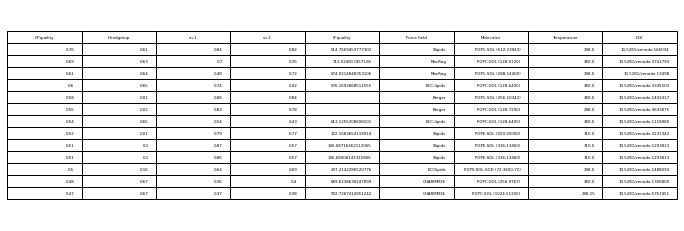

In [5]:
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=TR.values,colLabels=TR.columns,loc='center')

In [14]:
display(TR)

,OPquality,Headgroup,sn-1,sn-2,FFquality,Force field,Molecules,Temperature,DOI
1,0.76,0.61,0.84,0.82,514.766945,Slipids,POPC:SOL (512:23943),298.00,10.5281/zenodo.166034
2,0.69,0.63,0.70,0.76,713.024817,MacRog,POPC:SOL (128:5120),300.00,10.5281/zenodo.3741793
3,0.61,0.64,0.48,0.72,674.021485,MacRog,POPC:SOL (288:14400),298.00,10.5281/zenodo.13498
4,0.60,0.65,0.74,0.42,576.169287,ECC-lipids,POPC:SOL (128:6400),300.00,10.5281/zenodo.3335503
5,0.58,0.01,0.88,0.84,,Berger,POPC:SOL (256:10342),300.00,10.5281/zenodo.1402417
6,0.55,0.02,0.83,0.78,,Berger,POPC:SOL (128:7290),298.00,10.5281/zenodo.4643875
7,0.54,0.65,0.54,0.43,613.125521,ECC-lipids,POPC:SOL (128:6400),300.00,10.5281/zenodo.1118980
8,0.52,0.01,0.79,0.77,122.168365,Slipids,POPE:SOL (500:25000),310.00,10.5281/zenodo.3231342
9,0.51,0.10,0.87,0.57,140.087165,Slipids,POPE:SOL (336:13460),310.00,10.5281/zenodo.1293813
10,0.51,0.10,0.86,0.57,136.680061,Slipids,POPE:SOL (336:13460),310.00,10.5281/zenodo.1293813


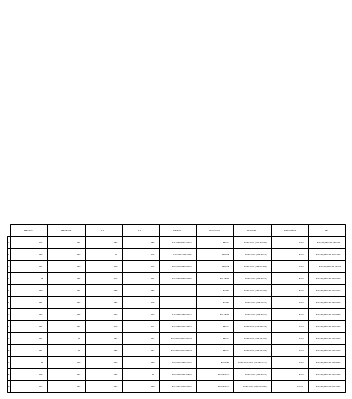

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, TR)  # where df is your data frame

plt.savefig('mytable.png')


In [23]:
f = open('exp.html','w')
a = TR.to_html()
f.write(a)
f.close()

In [22]:
import pdfkit

In [25]:
pdfkit.from_file('exp.html', 'example.pdf')


True

In [26]:
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn

def save_df_as_image(df, path):
    source = ColumnDataSource(df)
    df_columns = [df.index.name]
    df_columns.extend(df.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))

    data_table = DataTable(source=source, columns=columns_for_table,height_policy="auto",width_policy="auto",index_position=None)
    export_png(data_table, filename = path)

In [31]:
save_df_as_image(TR, 'tst')

ValueError: failed to validate TableColumn(id='1006', ...).field: expected a value of type str, got None of type NoneType

In [28]:
TR

,OPquality,Headgroup,sn-1,sn-2,FFquality,Force field,Molecules,Temperature,DOI
1,0.76,0.61,0.84,0.82,515,Slipids,POPC:SOL (512:23943),298.00,10.5281/zenodo.166034
2,0.69,0.63,0.70,0.76,713,MacRog,POPC:SOL (128:5120),300.00,10.5281/zenodo.3741793
3,0.61,0.64,0.48,0.72,674,MacRog,POPC:SOL (288:14400),298.00,10.5281/zenodo.13498
4,0.60,0.65,0.74,0.42,576,ECC-lipids,POPC:SOL (128:6400),300.00,10.5281/zenodo.3335503
5,0.58,0.01,0.88,0.84,,Berger,POPC:SOL (256:10342),300.00,10.5281/zenodo.1402417
6,0.55,0.02,0.83,0.78,,Berger,POPC:SOL (128:7290),298.00,10.5281/zenodo.4643875
7,0.54,0.65,0.54,0.43,613,ECC-lipids,POPC:SOL (128:6400),300.00,10.5281/zenodo.1118980
8,0.52,0.01,0.79,0.77,122,Slipids,POPE:SOL (500:25000),310.00,10.5281/zenodo.3231342
9,0.51,0.10,0.87,0.57,140,Slipids,POPE:SOL (336:13460),310.00,10.5281/zenodo.1293813
10,0.51,0.10,0.86,0.57,137,Slipids,POPE:SOL (336:13460),310.00,10.5281/zenodo.1293813
